In [28]:
import inspect

def print2(*args):
    frame = inspect.currentframe().f_back
    names = {id(v): k for k, v in frame.f_locals.items()}
    for arg in args:
        name = names.get(id(arg), '<unknown>')
        print(f"{name} = {arg}")

def vartodic(*args):
    frame = inspect.currentframe().f_back
    names = {id(v): k for k, v in frame.f_locals.items()}
    dic = {}
    for arg in args:
        name = names.get(id(arg), '<unknown>')
        dic[name] = arg
    return dic







aa = 0.25
bb = 0.87

print2(aa,bb)
vartodic(aa,bb)


aa = 0.25
bb = 0.87


{'aa': 0.25, 'bb': 0.87}

In [29]:
# oz to thinknes
# 1 oz ==> 1 oz of cupper by ft2
# 8,96 g/cm³ cupper
# 1 oz = 28,3495g
# 1ft = 30,48 cm
def oz_um_cal (oz):
  massekg = oz *28.3495/1e3
  # volum = area * thicknesss
  aream2 = (30.48*1e-2)**2
  rocukgm3= 8718 # this value is ajuste to found 105µm for 3 oz
  volumm3 = massekg/rocukgm3
  thickness= volumm3/aream2
  thicknessum= thickness*1e6
  return thicknessum
oz_um = {}
for oz in [0.5,1,2, 3]:
  thicknessum = oz_um_cal (oz)
  print(f"# {oz:.1f} oz ==> {thicknessum:.1f} µm")
  oz_um[oz]= thicknessum

# 0.5 oz ==> 17.50 µm
# 1.0 oz ==> 35.00 µm
# 2.0 oz ==> 70.00 µm
# 3.0 oz ==> 105.01 µm

# you can check again in
# https://pcbprime.com/pcb-tips/how-thick-is-1oz-copper/
print(oz_um)


# 0.5 oz ==> 17.5 µm
# 1.0 oz ==> 35.0 µm
# 2.0 oz ==> 70.0 µm
# 3.0 oz ==> 105.0 µm
{0.5: 17.501231839786204, 1: 35.00246367957241, 2: 70.00492735914482, 3: 105.00739103871722}


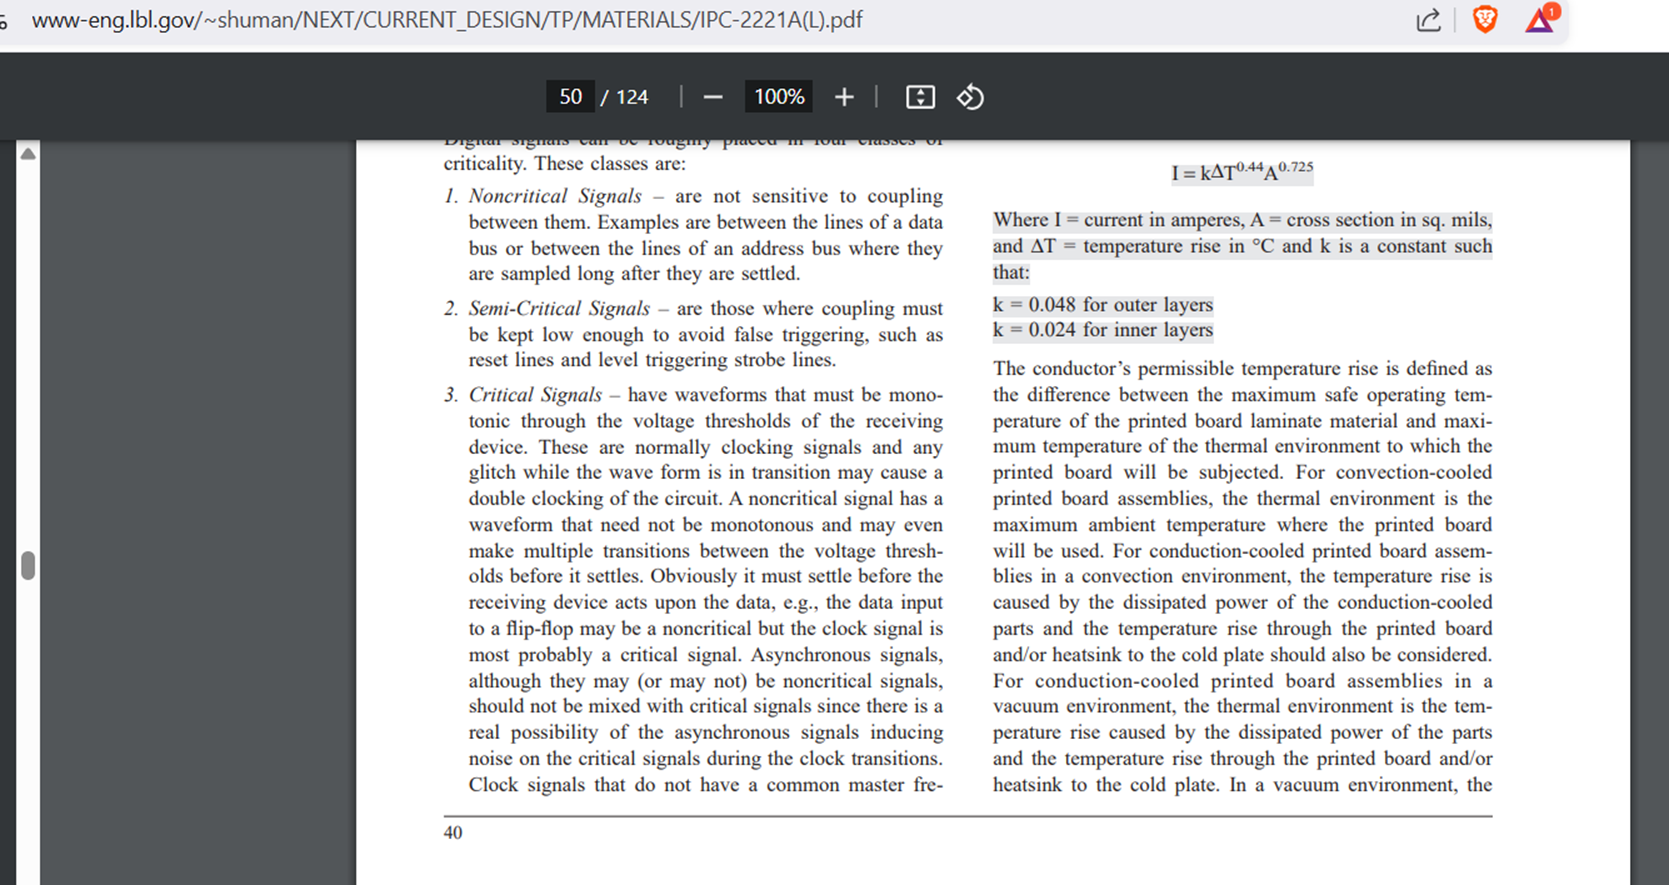

In [30]:
def ipc2221current(wmm, thicknessum, DT= 30, kind = "outer"):
  wmil =wmm /0.0254
  thmil = thicknessum /(0.0254*1000)
  areamils = wmil*thmil
  #print2(areamils)
  if kind =="outer":
    k = 0.048
  if kind =="inner":
    k = 0.024
  I = k*(DT**0.44) *(areamils**0.725)
  return I
wmm = 8.2
thicknessum = 72

I = ipc2221current(wmm, thicknessum, DT= 30, kind = "outer")
print2(I)

I = 30.077850976113666


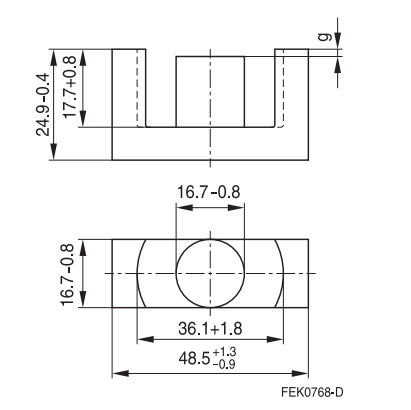

In [31]:
import pandas as pd
wmm = (36.1-16.7)/2-1
print2(wmm)
oz_signarios ={ "s1": [0.5,1], "s2":[1,2], "s3":[2,2]}

arr = []
brea=None
for DT in [20,30,40,50]:
  for (k, v ) in oz_signarios.items():
    oz_inner , oz_outer = v

    #print(oz_inner , oz_outer)
    um_inner = oz_um[oz_inner]
    um_outer = oz_um[oz_outer]
    #print2(oz_inner , oz_outer, um_inner, um_outer)

    Iouter = ipc2221current(wmm, um_outer, DT, kind = "outer")
    Iinner = ipc2221current(wmm, um_inner, DT, kind = "inner")
    Itotal= Iinner*2 + Iouter*2
    #print2(Iinner, Iouter, Itotal)

    #dic = vartodic(DT, oz_inner , oz_outer, um_inner, um_outer, Iinner, Iouter, Itotal)
    #print2(dic)
    dic = {'DT': DT,
    'oz_inner':  oz_inner ,
    'oz_outer':  oz_outer,
    'um_inner':  um_inner,
    'um_outer':  um_outer,
    'Iinner':  Iinner,
    'Iouter':  Iouter,
    'Itotal':  Itotal}
    arr.append(dic)


dfres = pd.DataFrame(arr)#.to_markdown()
dfres

wmm = 8.700000000000001


,DT,oz_inner,oz_outer,um_inner,um_outer,Iinner,Iouter,Itotal
0,20,0.5,1,17.501232,35.002464,4.710118,15.570713,40.561661
1,20,1.0,2,35.002464,70.004927,7.785356,25.736841,67.044396
2,20,2.0,2,70.004927,70.004927,12.868421,25.736841,77.210524
3,30,0.5,1,17.501232,35.002464,5.630046,18.611812,48.483715
4,30,1.0,2,35.002464,70.004927,9.305906,30.763476,80.138763
5,30,2.0,2,70.004927,70.004927,15.381738,30.763476,92.290427
6,40,0.5,1,17.501232,35.002464,6.389766,21.123297,55.026125
7,40,1.0,2,35.002464,70.004927,10.561648,34.914710,90.952717
8,40,2.0,2,70.004927,70.004927,17.457355,34.914710,104.744131
9,50,0.5,1,17.501232,35.002464,7.048965,23.302478,60.702886


In [32]:
oz_inner, oz_outer

(2, 2)

In [33]:
um_inner = oz_um[oz_inner]
um_outer = oz_um[oz_outer]

In [34]:
Iouter = ipc2221current(wmm, um_outer, DT, kind = "outer")
Iinner = ipc2221current(wmm, um_inner, DT, kind = "inner")

In [35]:
vartodic(DT, oz_inner , oz_outer, um_inner, um_outer, Iinner, Iouter, Itotal)

{'DT': 50,
 'it': 2,
 'um_outer': 70.00492735914482,
 'Iinner': 19.258340205566547,
 'Iouter': 38.516680411133095,
 'Itotal': 115.55004123339928}

# PCB LLC48V

In [36]:
def ipc2221current(wmm, thicknessum, DT=30, kind="outer"):
    """
    Calculate the allowable current for a PCB trace using the IPC-2221 standard.

    Parameters:
        wmm (float): Trace width in millimeters.
        thicknessum (float): Copper thickness in micrometers (µm).
        DT (float, optional): Allowed temperature rise in °C (default is 30°C).
        kind (str, optional): "outer" for external layer traces, "inner" for internal layer traces.

    Returns:
        float: Maximum allowable current in Amperes.
    """
    # IPC-2221A page 50 formula max current of pcb

    # Convert width from millimeters to mils (1 mil = 0.0254 mm)
    wmil = wmm / 0.0254  

    # Convert thickness from micrometers to mils (1 mil = 25.4 µm)
    thmil = thicknessum / (0.0254 * 1000)  

    # Calculate cross-sectional area in square mils
    areamils = wmil * thmil  

    # Determine constant k depending on whether it's an outer or inner layer
    if kind == "outer":
        k = 0.048
    if kind == "inner":
        k = 0.024

    # Apply IPC-2221 formula: I = k × (ΔT^0.44) × (Area^0.725)
    I = k * (DT ** 0.44) * (areamils ** 0.725)

    # Return calculated allowable current in Amperes
    return I


# Example input values
wmm = 8.2            # Trace width in mm
thicknessum = 72     # Copper thickness in µm

# Calculate current for outer layer with 30°C temperature rise
I = ipc2221current(wmm, thicknessum, DT=30, kind="outer")

# Print result (print2 should be replaced with print unless print2 is defined elsewhere)
print(I)


30.077850976113666


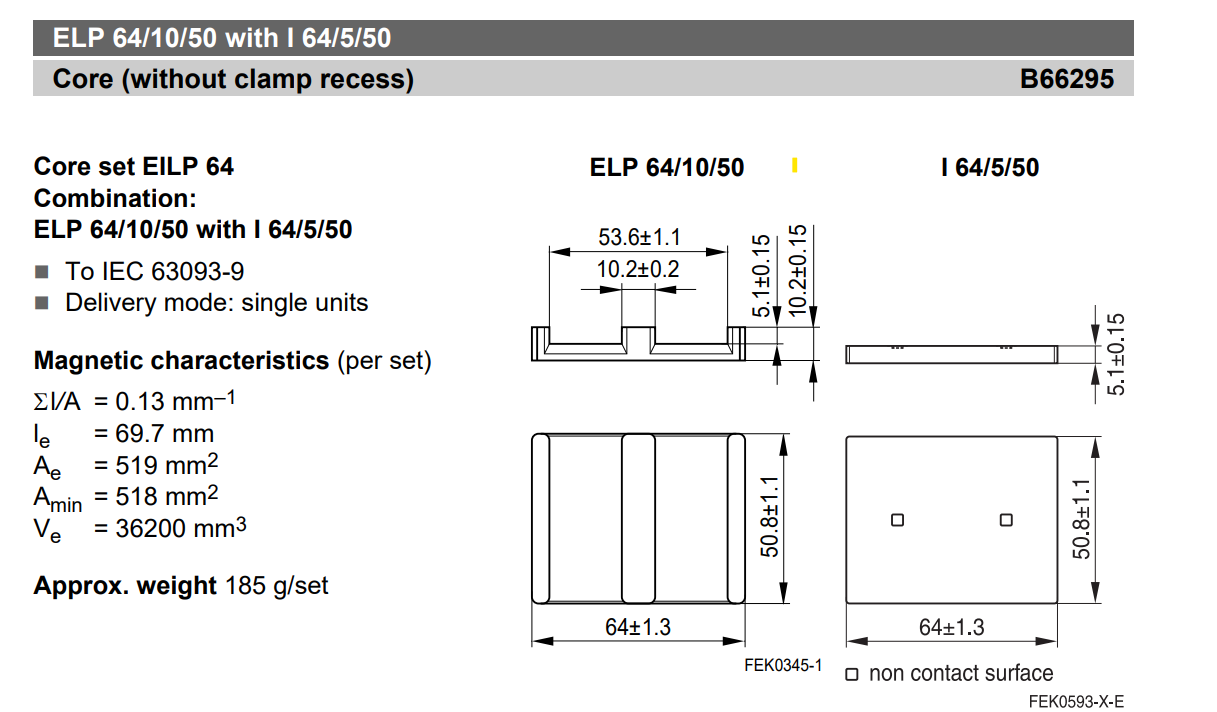

In [37]:
wmm= 0.9*(53.6-10.2)/2
wmm # Trace width in mm

19.530000000000005

In [38]:
         
thicknessum = 35   # Copper thickness in µm

# Calculate current for outer layer with 30°C temperature rise
Iouter = ipc2221current(wmm, thicknessum, DT=30, kind="outer")
Iinner = ipc2221current(wmm, thicknessum, DT=30, kind="inner")
Iouter, Iinner, Iouter+Iinner

(33.44830840380322, 16.72415420190161, 50.17246260570482)

In [39]:
ipc2221current(wmm=6.75, thicknessum=70, DT=30, kind="inner")

12.796082133480791

In [40]:
ipc2221current(wmm=7.125, thicknessum=70, DT=30, kind="inner")

13.307632944011262

In [41]:
ipc2221current(wmm=31.5, thicknessum=70, DT=30, kind="inner"), ipc2221current(wmm=31.5, thicknessum=70, DT=30, kind="outer")

(39.09371433753236, 78.18742867506472)

### PCB current 

In [42]:
def ipc2221current(wmm, thicknessum, DT= 30, kind = "outer"):
    # IPC-2221A page 50 formula max current of pcb
  wmil =wmm /0.0254
    # mm to milis, converting thickness in micrometers (µm) to mils (thousandths of an inch).
    # 1 mil=0.001 inch
    # 1 inch = 25.4 mm= 25400 um
  thmil = thicknessum /(0.0254*1000)
  areamils = wmil*thmil
  #print2(areamils)
  if kind =="outer":
    k = 0.048
  if kind =="inner":
    k = 0.024
  I = k*(DT**0.44) *(areamils**0.725)
  return I

In [43]:
def ipc2221_min_width(I, thicknessum, DT= 30, kind = "outer"):
    # IPC-2221A page 50 formula max current of pcb
    
    # mm to milis, converting thickness in micrometers (µm) to mils (thousandths of an inch).
    # 1 mil=0.001 inch
    # 1 inch = 25.4 mm= 25400 um
    thmil = thicknessum /(0.0254*1000)

    #print2(areamils)
    if kind =="outer":
        k = 0.048
    if kind =="inner":
        k = 0.024
    
    #I = k*(DT**0.44) *(areamils**0.725)
    areamils = (I / (k * (DT**0.44)))**(1/0.725)
    # areamils = wmil*thmil
    wmil= areamils/thmil
    #wmil =wmm /0.0254
    wmm= wmil*0.0254
    return wmm

In [44]:
#2oz 68.114um 

In [45]:
import matplotlib.pyplot as plt


In [46]:
import numpy as np

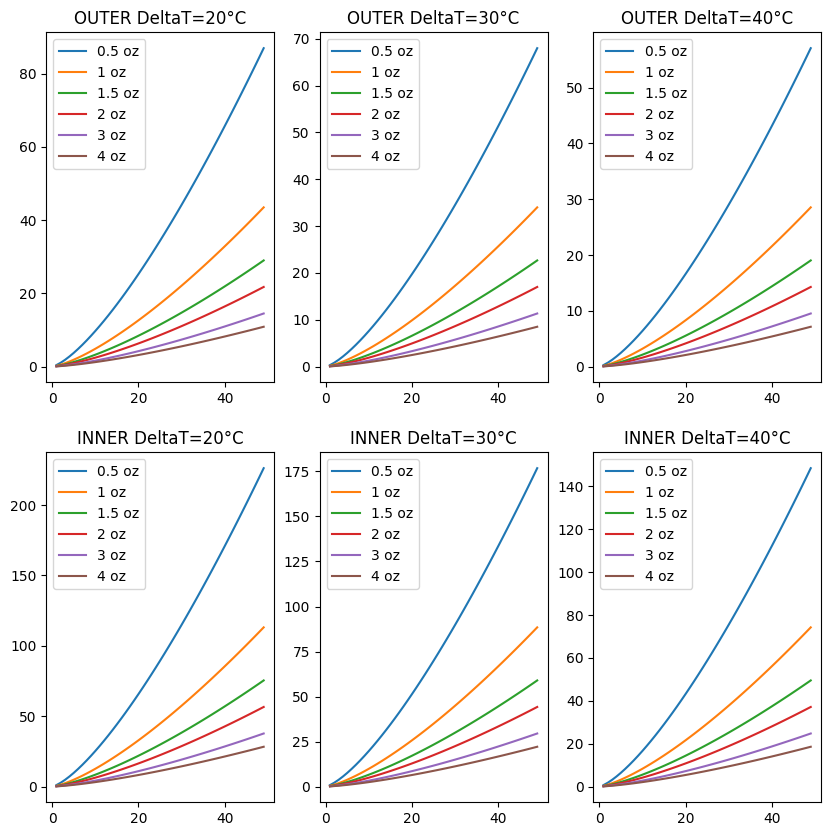

In [47]:
fig, axs = plt.subplots(2,3,figsize=(10,10))
Iarr= np.arange(1,50,1)
import numpy as np
for ik, kind in enumerate(("outer", "inner")):
    for it, DT in enumerate ((20,30,40)):
        ax = axs[ik][it]
        for oz in (0.5,1,1.5,2,3,4):
            arr=[]
            for I in Iarr:
                thickness_um = 68.114*oz/2
                
                #i= ipc2221current(wmm=2, thicknessum=thickness_um, DT= 30, kind = "outer")
                
                Wmm= ipc2221_min_width(I=I, thicknessum=thickness_um, DT= DT, kind = kind)
                arr.append(Wmm)
            ax.plot(Iarr, arr, label =f"{oz} oz")
            ax.set_title(f"{kind.upper()} DeltaT={DT}°C")
        ax.legend()

In [126]:
arr=[]
for ik, kind in enumerate(("outer", "inner")):
    for oz in (0.5,1,1.5,2):
        thickness_um = 68.114*oz/2
        Wprim = ipc2221_min_width(I=10.354, thicknessum=thickness_um, DT= 50, kind = kind)
        arr.append({"kind":kind, "oz":oz, "Width_mm":Wprim})
import pandas as pd
print("Primary side")
pd.DataFrame(arr)

Primary side


,kind,oz,Width_mm
0,outer,0.5,5.841425
1,outer,1.0,2.920712
2,outer,1.5,1.947142
3,outer,2.0,1.460356
4,inner,0.5,15.196115
5,inner,1.0,7.598058
6,inner,1.5,5.065372
7,inner,2.0,3.799029


In [127]:
ipc2221_min_width(I=10.354, thicknessum=thickness_um, DT= 30, kind = kind)

5.17978615056892

In [128]:
ipc2221_min_width(I=10.354, thicknessum=thickness_um, DT= 50, kind = kind)

3.7990288267080277

In [129]:
arr=[]
for ik, kind in enumerate(("outer", "inner")):
    for oz in (0.5,1,1.5,2):
        thickness_um = 68.114*oz/2
        Wsec = ipc2221_min_width(I=10.354*4, thicknessum=thickness_um, DT= 30, kind = kind)
        arr.append({"kind":kind, "oz":oz, "Width_mm":Wsec})
import pandas as pd
print("Secondary side")
pd.DataFrame(arr)

Secondary side


,kind,oz,Width_mm
0,outer,0.5,53.899608
1,outer,1.0,26.949804
2,outer,1.5,17.966536
3,outer,2.0,13.474902
4,inner,0.5,140.216588
5,inner,1.0,70.108294
6,inner,1.5,46.738863
7,inner,2.0,35.054147


In [130]:
ipc2221current(wmm=0.45, thicknessum=70, DT= 30, kind = "outer")

3.592864608897873

In [131]:
ipc2221current(wmm=1, thicknessum=70, DT= 30, kind = "inner")

3.205027673169062

In [132]:
+135-55

80

In [133]:
import pandas as pd
# fr4 tg135
t="""outer 	inner	JLCprice 140x300
1	0.5	45.3
1	1	62.66
1	2	81.68
2	2	116.48""".split("\n")
t=[x.split("\t") for x in t]
cols=[x.strip() for x in t[0]]
df =pd.DataFrame(t[1:], columns = cols).astype(float)
#2oz 68.114um 

In [134]:
df

,outer,inner,JLCprice 140x300
0,1.0,0.5,45.30
1,1.0,1.0,62.66
2,1.0,2.0,81.68
3,2.0,2.0,116.48


In [135]:
DT= 40
dic = {"secondary":10.354*4, "primary":10.354}
for type, v in dic.items():
    I= v
    for i in range(len(df)):
        for kind in ("outer", "inner"):
            #print(i,kind)
            oz=df.loc[i,kind]
            thickness_um = 68.114*oz/2
            Wsec = ipc2221_min_width(I=I, thicknessum=thickness_um, DT= DT, kind = kind)
            df.loc[i,kind+"_minW_"+typ[:4]]=Wsec
display(df)

,outer,inner,JLCprice 140x300,outer_minW_prim,inner_minW_prim
0,1.0,0.5,45.30,3.344284,17.399907
1,1.0,1.0,62.66,3.344284,8.699954
2,1.0,2.0,81.68,3.344284,4.349977
3,2.0,2.0,116.48,1.672142,4.349977


In [136]:
k

'primary'

In [137]:
print("good equilibre")
df.iloc[2,:].to_frame().T

good equilibre


,outer,inner,JLCprice 140x300,outer_minW_prim,inner_minW_prim
2,1.0,2.0,81.68,3.344284,4.349977


In [138]:
df["JLCprice 140x300"].diff()

0      NaN
1    17.36
2    19.02
3    34.80
Name: JLCprice 140x300, dtype: float64

In [140]:
DT= 40
dic = {"secondary":7.636 *4/np.sqrt(2), "primary":7.636 }
for typ, v in dic.items():
    I= v
    for i in range(len(df)):
        for kind in ("outer", "inner"):
            #print(i,kind)
            oz=df.loc[i,kind]
            thickness_um = 68.114*oz/2
            #print(I)
            Wsec = ipc2221_min_width(I=I, thicknessum=thickness_um, DT= DT, kind = kind)
            #print(Wsec)
            df.loc[i,kind+"_minW_"+typ[:4]]=Wsec
display(df)

,outer,inner,JLCprice 140x300,outer_minW_prim,inner_minW_prim,outer_minW_seco,inner_minW_seco
0,1.0,0.5,45.30,2.197354,11.432569,9.219784,47.969426
1,1.0,1.0,62.66,2.197354,5.716285,9.219784,23.984713
2,1.0,2.0,81.68,2.197354,2.858142,9.219784,11.992357
3,2.0,2.0,116.48,1.098677,2.858142,4.609892,11.992357


In [125]:
v

7.636